<a href="https://colab.research.google.com/github/Mix1996/Prediction-of-Product-Sales/blob/main/Mikhail_Pillay_Belt_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belt Exam
Name: Mikhail Pillay

## Import Libraries

In [376]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## **Data Dictionary**

In [377]:
# Load the data
dataset ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS1dPoQOoqwI17yqZAjAiuSgNoY16lMRUFzDMfaLs9IVb0IQFxxNHOvBJ0HO_NBiM9fNsussKkrx2bO/pub?output=csv"
df = pd.read_csv(dataset)
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [378]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 296 rows, and 6 columns.
The rows represent 296 observations, and the columns represent 5 features and 1 target variable.


In [379]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


## **Clean the Data**

###Remove Unecessary Rows

In [380]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 15 duplicate rows.


In [381]:
# Drop duplicte rows
df.drop_duplicates(inplace=True)

### **Missing Values**

In [382]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 129 missing values.


In [383]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

In [384]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,Age
count,227.000000
mean,47.475771
std,38.359652
min,15.000000
25%,32.000000
50%,45.000000
75%,59.000000
max,570.000000


In [385]:
# Check for and address any inconsistent values in categorical columns.

df.describe(include='object')

,Gender,BP,Cholesterol,Na_to_K,Drug
count,281,206,281,281,281
unique,8,3,5,183,2
top,M,High,HIGH,12.766,drugZ
freq,140,128,145,7,147


In [386]:
# Checking for discrepancies in categorical data column 'Gender'
df['Gender'].value_counts()

M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

In [387]:
# Fixing discrepancies
df['Gender'].replace({"male":"M", "female":"F", "Male":"M","Female":"F", "femal":"F", "Femal":"F"}, inplace = True)
df['Gender'].value_counts()

M    145
F    136
Name: Gender, dtype: int64

In [388]:
# Checking for discrepancies in categorical data column 'BP'
df['BP'].value_counts()

High      128
Normal     46
Low        32
Name: BP, dtype: int64

In [389]:
# Checking for discrepancies in categorical data column 'Cholesterol'
df['Cholesterol'].value_counts()

HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64

In [390]:
# Fixing discrepancies
df['Cholesterol'].replace({"norm":"NORMAL", "NORM":"NORMAL", "high":"HIGH"}, inplace = True)
df['Cholesterol'].value_counts()

HIGH      152
NORMAL    129
Name: Cholesterol, dtype: int64

In [391]:
# Checking for discrepancies in categorical data column 'Na_to_K'
df['Na_to_K'].value_counts()

12.766    7
12.307    6
11.009    6
11.198    6
12.854    6
         ..
8.107     1
10.443    1
11.455    1
16.347    1
12.879    1
Name: Na_to_K, Length: 183, dtype: int64

In [392]:
# Clean the 'Na_to_K' column by removing non-numeric characters
df['Na_to_K'] = df['Na_to_K'].str.replace('_', '', regex=False)

In [393]:
# Convert 'Na_to_K' to float
df['Na_to_K'] = df['Na_to_K'].astype(float)

In [394]:
# Checking for discrepancies in categorical data column 'Cholesterol'
df['Drug'].value_counts()

drugZ    147
drugQ    134
Name: Drug, dtype: int64

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


In [396]:
# Data Exploration and Cleaning

# Check for missing values and impute them
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values based on your chosen strategy
# Use median imputation for numeric columns and mode imputation for categorical columns.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

mode_bp = df['BP'].mode()[0]
df['BP'].fillna(mode_bp, inplace=True)

mode_cholesterol = df['Cholesterol'].mode()[0]
df['Cholesterol'].fillna(mode_cholesterol, inplace=True)

median_na_to_k = df['Na_to_K'].median()
df['Na_to_K'].fillna(median_na_to_k, inplace=True)

# Check for inconsistent values in categorical columns
# Assuming Gender, BP, and Cholesterol have inconsistent values
# Apply lowercase and strip leading/trailing whitespaces for consistency
df['Gender'] = df['Gender'].str.lower().str.strip()
df['BP'] = df['BP'].str.lower().str.strip()
df['Cholesterol'] = df['Cholesterol'].str.lower().str.strip()

# Check for impossible values in numeric columns (Age, Na_to_K)
# Define reasonable value ranges and filter out rows with impossible values
data = df[(df['Age'] >= 0) & (df['Age'] <= 120)]  # Example age range
data = data[(data['Na_to_K'] > 0)]  # Assuming Na_to_K should be strictly positive

# Display the cleaned dataset
print("Cleaned Dataset:\n", data.head())


Missing Values:
 Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64
Cleaned Dataset:
     Age Gender      BP Cholesterol  Na_to_K   Drug
0  59.0      m    high        high   13.935  drugQ
1  40.0      f  normal        high   10.103  drugZ
2  45.0      m  normal        high    9.084  drugZ
3  62.0      m  normal        high   16.594  drugZ
4  55.0      f    high      normal   10.977  drugQ


## **Explore the data**

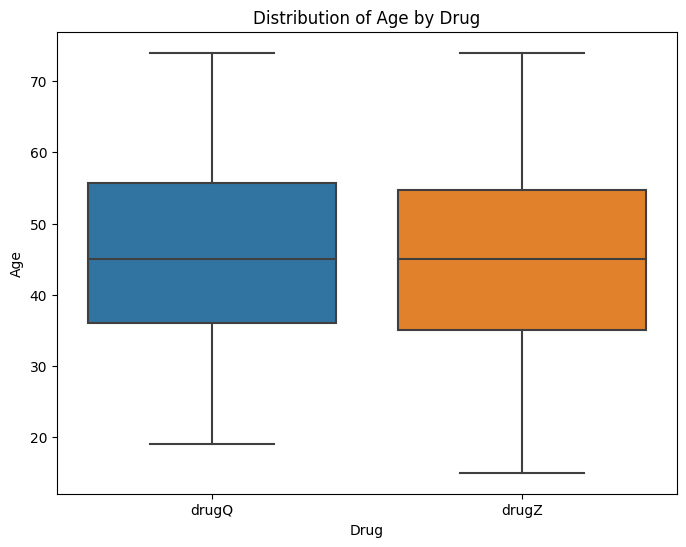

In [397]:
# Visualization 1: Box Plot of Age by Drug
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Drug', y='Age')
plt.xlabel('Drug')
plt.ylabel('Age')
plt.title('Distribution of Age by Drug')
plt.show()

This visualization shows the distribution of ages for different drug types. It tells us that 'drugZ' tends to be prescribed to younger patients, while 'drugQ' is prescribed to patients across a slightly higer age range. 'drugQ' and 'drugZ' has a relatively similar median age.

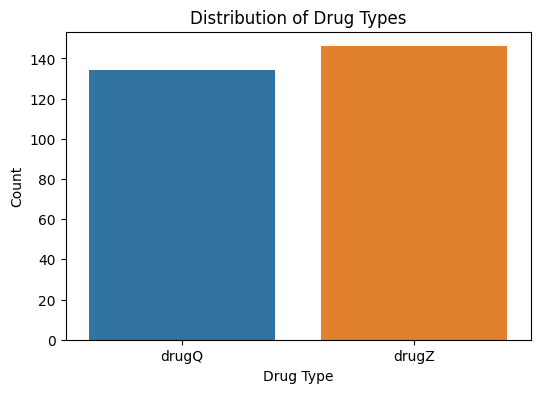

In [486]:
# Visualization 2: Count Plot of Drug Types
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Drug')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.title('Distribution of Drug Types')
plt.show()

This count plot displays the distribution of different drug types in the dataset. It tells us that 'drugZ' appears to be the most commonly prescribed drug, while 'drugY' is the least common among the given data points. This visualization provides an overview of the distribution of drug types in the dataset.

## **Model Validation Data Split**

In [399]:
# Create a copy of the dataset for Modeling
df_ml = df.copy()

In [400]:
# Check how many samples of each class are present
df_ml['Drug'].value_counts(normalize=False)

drugZ    147
drugQ    134
Name: Drug, dtype: int64

### **Split the Data**

In [401]:
# Define features (X) and target (y)
target = 'Drug'
X = df.drop(columns = ['Drug']).copy()
y = df[target].copy()

In [402]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Check Class Balance

In [403]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

drugZ    0.52381
drugQ    0.47619
Name: Drug, dtype: float64

In [404]:
y_test.value_counts(normalize=True)

drugZ    0.521127
drugQ    0.478873
Name: Drug, dtype: float64

### **Prepare the data appropriately for modeling:**

#### **Numeric Transformation**

In [405]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [406]:
num_selector(X_train)

['Age', 'Na_to_K']

#### **Ordinal Transformation**

In [407]:
# Ordered Category Lists

bp_list = ['low', 'normal', 'high']
cholestrol_list = ['normal','high']

# Transformers

ord = OrdinalEncoder(categories=[bp_list, cholestrol_list],handle_unknown='use_encoded_value',unknown_value = -1)

# We will use a most frequent imputer to impute missing values for the ordinal columns
freq_imputer = SimpleImputer(strategy='most_frequent')

# We have more than 2 ordinal values for each column so using scaler
scaler2 = StandardScaler()


# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)
# Selector
#ordinal_cols = make_column_selector(dtype_include= 'object')
#ordinal_cols = ['raw ethanol', 'pressure[hpa]']
ordinal_cols = ['BP','Cholesterol']
# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

In [408]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       ordinal_tuple,
                                       remainder='drop')

In [409]:
y_pre = preprocessor.fit(X_train)

Ordinal encoding is suitable for categorical variables when there is an inherent order or ranking among the categories.
If the categorical variable has a meaningful order or hierarchy, preserving that order can provide valuable information to the model. For example, in the 'Blood Pressure' ('BP') and 'Cholesterol' columns, we can reasonably assume that there's an order ('Low' < 'Normal' < 'High').

One-hot encoding is appropriate for nominal categorical variables with no meaningful order or ranking among the categories. For example, the 'Gender' column is nominal since there's no meaningful order between 'Male' and 'Female.'

## **Create and compare at least 2 different models:**

In [474]:
def classification_metrics(model, X_test, y_test, label='Test Data',
                            figsize=(15, 5), normalize='true',
                            cmap='Greens', thresh=0.5):

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Get the predictions
    y_proba = model.predict_proba(X_test)
    # Convert y_pred to strings ('drugQ' or 'drugZ') based on the threshold
    y_pred = ['drugZ' if x[1] > thresh else 'drugQ' for x in y_proba]

    # Print classification report for the test data (and make it pretty!)
    print('---' * 20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---' * 20)

    print(classification_report(y_test, y_pred))

    # Confusion matrix and ROC curve display code remains the same
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                           normalize=normalize, cmap=cmap,
                                           ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])

    plt.show()


### **KNN Model**

In [452]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'normal',
                                                                                               'high'],
                                                                                              ['normal',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **KNN Model Evaluation**

In [453]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [454]:
## print the classification reports
labels = ['drugQ','drugZ']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       drugQ       0.88      0.99      0.93       100
       drugZ       0.99      0.87      0.93       110

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.93      0.93       210

Test Report
              precision    recall  f1-score   support

       drugQ       0.89      1.00      0.94        34
       drugZ       1.00      0.89      0.94        37

    accuracy                           0.94        71
   macro avg       0.95      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



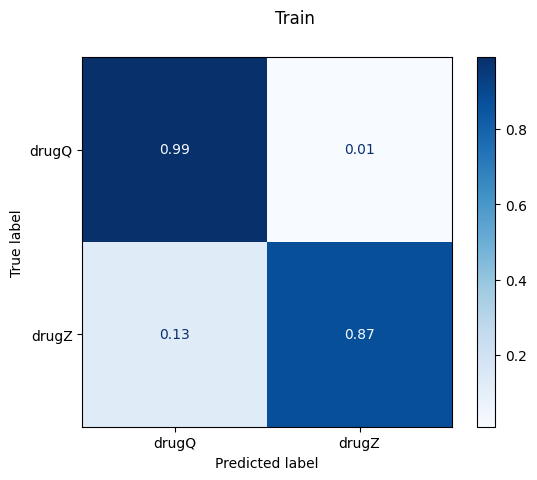

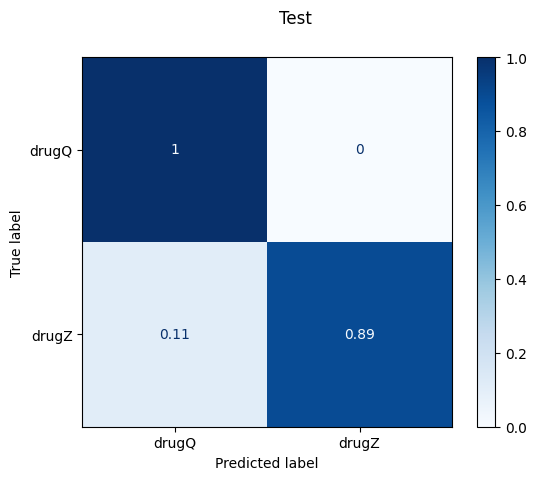

In [455]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Blues')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Blues')
plt.suptitle('Test');

#### Tune the Hyperparameters

In [456]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['low',
                                                                                 'normal',
                           

In [457]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [458]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                                          OrdinalEncoder(categories=[['low',
                                                                                                                      'normal',
                                                                                                                      'high'],
                                                                                                                     ['normal',
                                                                                                                      'high']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['BP',
                                                                          'Cholesterol'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [459]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [460]:
knn_gs.best_score_

0.919047619047619

In [461]:
best_knn = knn_gs.best_estimator_

In [462]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [463]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

       drugQ       0.90      1.00      0.95       100
       drugZ       1.00      0.90      0.95       110

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Test
               precision    recall  f1-score   support

       drugQ       0.92      0.97      0.94        34
       drugZ       0.97      0.92      0.94        37

    accuracy                           0.94        71
   macro avg       0.94      0.94      0.94        71
weighted avg       0.95      0.94      0.94        71



Text(0.5, 1.0, 'Test CM')

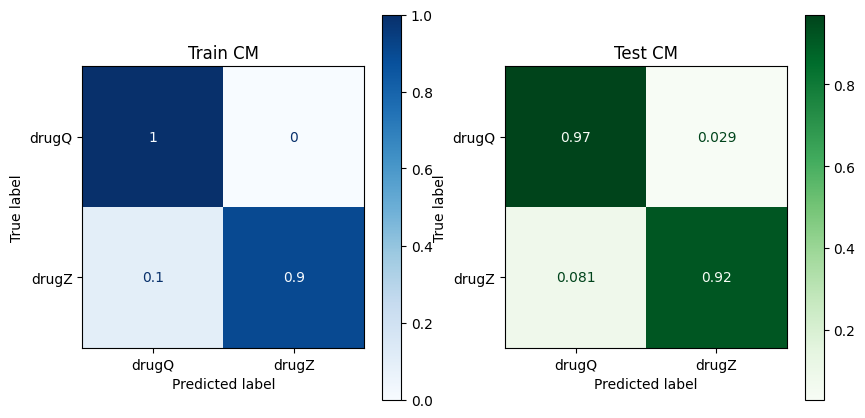

In [464]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')

### **Decision Tree Classifier**

In [465]:
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(preprocessor, dt)

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'normal',
                                                                                               'high'],
                                                                                              ['normal',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### **Decision Tree Model Evaluation**

In [466]:
train_preds = dt_pipe.predict(X_train)
test_preds = dt_pipe.predict(X_test)

print('train')
print(classification_report(y_train, train_preds))

print('test')
print(classification_report(y_test, test_preds))

train
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       100
       drugZ       1.00      1.00      1.00       110

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

test
              precision    recall  f1-score   support

       drugQ       0.94      0.91      0.93        34
       drugZ       0.92      0.95      0.93        37

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.93      0.93      0.93        71



### **Logistical Regression**

In [467]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'normal',
                                                                                               'high'],
                                                                                              ['normal',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [468]:
## Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
## Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [475]:
## print the classification reports
labels = ['drugQ','drugZ']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       drugQ       0.88      1.00      0.93       100
       drugZ       1.00      0.87      0.93       110

    accuracy                           0.93       210
   macro avg       0.94      0.94      0.93       210
weighted avg       0.94      0.93      0.93       210

Test Report
              precision    recall  f1-score   support

       drugQ       0.92      1.00      0.96        34
       drugZ       1.00      0.92      0.96        37

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.87      0.58      0.69       100
       drugZ       0.71      0.92      0.80       110

    accuracy                           0.76       210
   macro avg       0.79      0.75      0.75       210
weighted avg       0.78      0.76      0.75       210



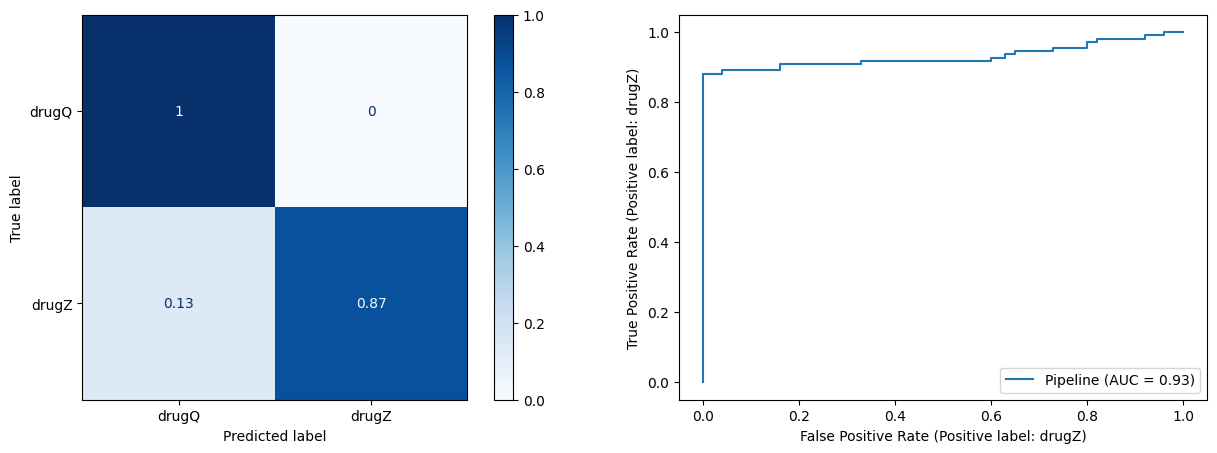

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.65      0.75        34
       drugZ       0.74      0.92      0.82        37

    accuracy                           0.79        71
   macro avg       0.81      0.78      0.78        71
weighted avg       0.81      0.79      0.78        71



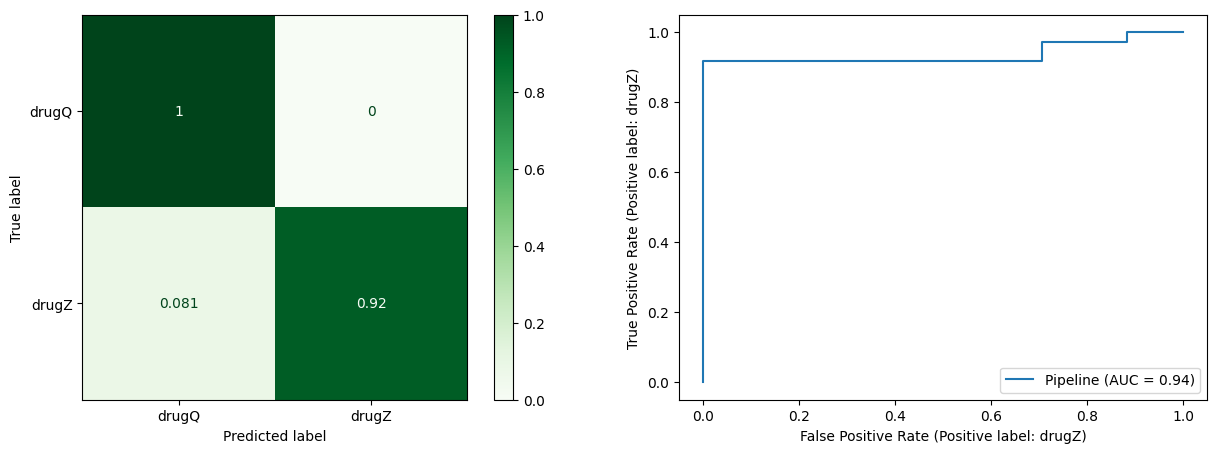

In [478]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

#### Tune the Hyperparameters

In [480]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['low',
                                                                                 'normal',
                           

In [481]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [482]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb95b446260>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['low',
                                                                                                                      'normal',
                                                                                                                      'high'],
                                                                                                                     ['normal',
                                                                                                                      'high']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['BP',
                                                                          'Cholesterol'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [483]:
lr_gs.best_params_

{'logisticregression__C': 100}

In [438]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.68      0.77       100
       drugZ       0.76      0.92      0.83       110

    accuracy                           0.80       210
   macro avg       0.82      0.80      0.80       210
weighted avg       0.82      0.80      0.80       210



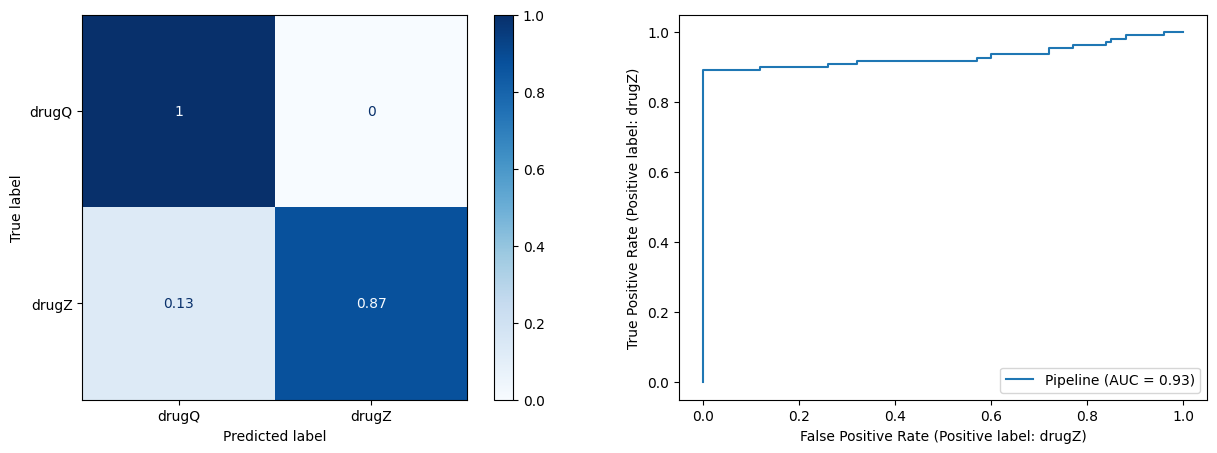

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.91      0.88      0.90        34
       drugZ       0.89      0.92      0.91        37

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.90        71
weighted avg       0.90      0.90      0.90        71



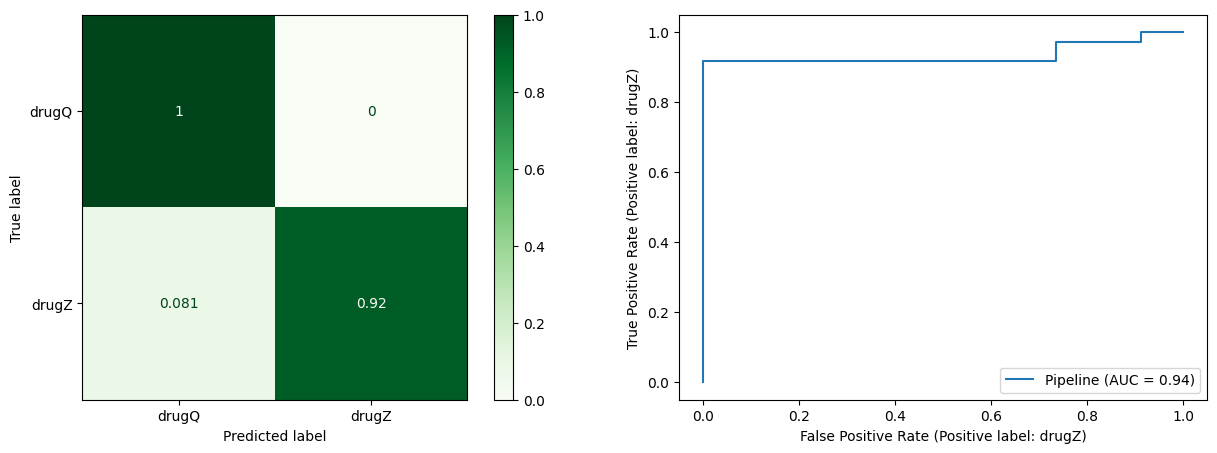

In [485]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

## **Final model**

Model of Choice:
overview of the evaluation metrics for each model on the test data:

**KNN Model:**

Accuracy: 0.94
Precision: drugQ - 0.92, drugZ - 0.97
Recall: drugQ - 0.97, drugZ - 0.92
F1-score: drugQ - 0.94, drugZ - 0.94


**Decision Tree Model:**

Accuracy: 0.93
Precision: drugQ - 0.94, drugZ - 0.92
Recall: drugQ - 0.91, drugZ - 0.95
F1-score: drugQ - 0.93, drugZ - 0.93


**Logistic Regression:**

Accuracy: 0.90
Precision: drugQ - 0.91, drugZ - 0.89
Recall: drugQ - 0.88, drugZ - 0.92
F1-score: drugQ - 0.90, drugZ - 0.91

The **Decision Tree Model** has the highest accuracy on the test data (0.93) and a balanced F1-score for both drugQ and drugZ (0.93), indicating good overall performance.

The **KNN Model** also performs well with an accuracy of 0.94 and balanced F1-scores for both classes (0.94).

The **Logistic Regression model**, while decent, has slightly lower accuracy (0.90) and F1-scores compared to the other two models.

In this case, both the Decision Tree Model and the KNN Model appear to be good choices, with the **Decision Tree Model** having a slight edge in accuracy. Decision Tree Model would be the best choice.

##**Sources**

**Classification Metrics Exercise:**
https://colab.research.google.com/drive/1kcrfzpNb4sjkRlHSnEWc-n3Vo64nv2dv#scrollTo=Jz0bpAN3cqmw

**MockBeltExam_Classification:**https://colab.research.google.com/drive/1whrOd1qYjgvX0GIDKFH1FgEsICuahO-E#scrollTo=trXJNYY-nXdz

**Week 5 - Lesson 1 slides:**https://docs.google.com/presentation/d/1-67rJIOJ9dX5MKKObcOubc61hRuI-OqdiKgul0J3ze8/edit#slide=id.g27804763418_0_113

**Code Along Challenge - ROC AUC.ipynb:**
https://colab.research.google.com/drive/17p8t4JZVywJlyUANYuvbvzfJ5fweF8tf#scrollTo=rpuu5-lZTJSN